# Kesifci Veri Analizi

## Kutuphane Yukleme

In [26]:
# data analysis libraries:
import numpy as np
import pandas as pd

# data visualization libraries:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV

## Warningleri Iptal Etme

In [27]:
# to ignore warnings:
import warnings
warnings.filterwarnings('ignore')

## Satirin Tamamini Gorme

In [28]:
# to display all columns:
pd.set_option('display.max_columns', None)

## Veriyi Yukleme

In [38]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("Dekstop/KAGGLE_SURVEY/Projelerim_Bitmis/test.csv")

FileNotFoundError: [Errno 2] File b'Dekstop/KAGGLE_SURVEY/Projelerim_Bitmis/train.csv' does not exist: b'Dekstop/KAGGLE_SURVEY/Projelerim_Bitmis/train.csv'

In [ ]:
import numpy as np

## Veriyi Yedekleme

In [50]:
df = train_data.copy()
df_t = test_data.copy()

## Veriyi Inceleme

In [51]:
df.head()
df.tail()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [52]:
df["Pclass"].value_counts().sum()

891

In [53]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [54]:
df["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

## Degiskenleri Yeniden Isimlendirme .columns

In [22]:
m=np.arange(1,21).reshape((4,5))
d1=pd.DataFrame(m,columns=["d1","d2","d3","d4","d5"])
d1

,d1,d2,d3,d4,d5
0,1,2,3,4,5
1,6,7,8,9,10
2,11,12,13,14,15
3,16,17,18,19,20


In [45]:
# veya
d1.columns=("d1","d2","f3","f4","f5")
d1

,d1,d2,f3,f4,f5
a,1,2,3,4,5
c,6,7,8,9,10
d,11,12,13,14,15
b,16,17,18,19,20


## Indexi Yeniden Isimlendirme 

In [51]:
d1.index=["a","c","d","b"]
d1

,d1,d2,f3,f4,f5
a,1,2,3,4,5
c,6,7,8,9,10
d,11,12,13,14,15
b,16,17,18,19,20


,d1,d2,f3,f4,f5
2,1,2,3,4,5
3,6,7,8,9,10
1,11,12,13,14,15
4,16,17,18,19,20


## Birlestirme .concat ve reset etme

In [42]:
n=np.arange(1,21).reshape((4,5))
d2=pd.DataFrame(m,columns=["d1","d2","d3","d4","d5"])
d2.index=["a","c","d","b"]
d2

,d1,d2,d3,d4,d5
a,1,2,3,4,5
c,6,7,8,9,10
d,11,12,13,14,15
b,16,17,18,19,20


In [56]:
pd.concat([d1,d2],ignore_index=True)

,d1,d2,d3,d4,d5,f3,f4,f5
0,1,2,NaN,NaN,NaN,3.0,4.0,5.0
1,6,7,NaN,NaN,NaN,8.0,9.0,10.0
2,11,12,NaN,NaN,NaN,13.0,14.0,15.0
3,16,17,NaN,NaN,NaN,18.0,19.0,20.0
4,1,2,3.0,4.0,5.0,NaN,NaN,NaN
5,6,7,8.0,9.0,10.0,NaN,NaN,NaN
6,11,12,13.0,14.0,15.0,NaN,NaN,NaN
7,16,17,18.0,19.0,20.0,NaN,NaN,NaN


In [ ]:
## Ileri Birlestirme 

## Kesif Gorsellestirme

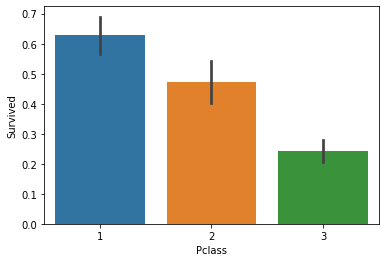

In [56]:
sns.barplot(x = 'Pclass', y = 'Survived', data = df);

# Veri Hazirlama

## Silme

### Degisken Silme

In [25]:
df = df.drop(['Ticket'], axis = 1, inplace=True)

KeyError: "['Ticket'] not found in axis"

### Verideki Tum Eksik Gozlemleri Silme

In [ ]:
df=df.dropna()

## Aykiri Gozlem Analizi

In [58]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


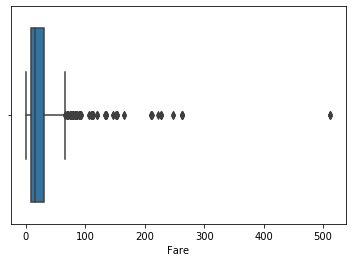

In [59]:
sns.boxplot(x = train['Fare']);

In [60]:
Q1 = train['Fare'].quantile(0.10)
Q3 = train['Fare'].quantile(0.90)
IQR = Q3 - Q1

lower_limit = Q1- 1.5*IQR
print(lower_limit)

upper_limit = Q3 + 1.5*IQR
upper_limit

-98.06245


183.57074999999998

In [61]:
# observations with Fare data higher than the upper limit:
train[train['Fare'] > (upper_limit)].count()

PassengerId    20
Survived       20
Pclass         20
Name           20
Sex            20
Age            18
SibSp          20
Parch          20
Ticket         20
Fare           20
Cabin          17
Embarked       20
dtype: int64

### Degerleri Buyukten Kucuge Siralama

In [62]:
train.sort_values("Fare", ascending=False).head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
